# 湾区自行车共享分析

报告人：Limber Cheng（程泽华）

## 简介

湾区自行车共享系统（[Bay Area Bike Share](http://www.bayareabikeshare.com/)）是一家为旧金山、雷德伍德城、帕罗奥多、芒廷维尤和圣荷西的客户提供按需自行车租赁的公司。使用者可在每个城市的各种车站解锁自行车，然后在同城内的任何一个车站还车。使用者可通过按年订购或购买 3 日或 24 小时通票来付费。使用者的出行次数无限制，三十分钟内的行程不收取额外费用；更长行程将产生超时费。

**1.**：三十分钟到一个小时的行程占总使用情况的比重是多少？有没有有必要将三十分钟的限制做出一定的变动？

**2.**：通过按年订购的使用者使用湾区自行车共享系统的频率是否比其他购买方式的人的年使用频率更高？

**3.**：使用者在不同天气的影响下的使用湾区自行车共享系统的行程时间长度有什么关系？

**4.**：在不同的天气影响下，人们对选择各车站的选择有什么变化？

**5.**：不同的车站的使用频率有哪些特点？哪些车站的使用频率特别高？哪些车站的使用频率特别低？

**6.**：系统内，每周、每月、每季度的借出自行车数量是多少？是否存在某个月份的使用次数异常高或者异常的低？具体表现是怎样的？

**7.**：人们最经常用共享系统去哪里？

**8.**：一天之内，人们还车的时间有什么特点？

## 使用可视化交流数据发现

通过不同数据的对比的结果可以对整个数据有一个大局的态的认识。将数据用简单的表格方式呈现，最为直观。不能回答所有的问题，但能够回答部分问题。因为并没有给出所需要的数据呈现（即没有给出半小时至一小时行程占总使用情况的比重的数据。）

**问题回答**：

**1.**:在后文的数据可视化对比中，发现30分钟以内的使用者的数量占绝大部分比重，对比三十分钟以内使用者数量与三十分钟至一个小时的使用者的数量，三十分钟以内的使用者的数量远大于三十分钟至六十分钟以内的使用者的数量（具体表现为三十分钟以内使用超过六十万次，而三十分钟至一个小时以内的使用次数低于十万次）。同时，由作图得知，使用时间5-10分钟内以后的使用次数呈均匀递减，并且直至30分钟使用者的边际（使用时间为29分钟到31分钟）时，依然符合递减规律。无突变情况，故不需要调整三十分钟的使用时间。因目前缺乏使用数据求比例的能力，无法回答“三十分钟到一个小时的行程占总使用情况的比重是多少？”的问题。

**2.**:数据中没有提到不同购买方式的使用者的使用频率，根据下图报告，有80%的骑乘情况是以年递交作为要求的。

有将近80%的使用者是年费使用者，剩余20%的使用者是通过购买24小时或3天的使用券。

**3、4.**：因为目前还未研究过天气数据与自行车使用之间的联系。所以无法回答。

**5.**：在报告中，有提到在Station:San Francisco Caltrain (Townsend at 4th)的频率最高，为9,838次。在Station:Townsend at 7th的频率最低，为4,493次。极差为5,345次。

**6.**：在下面的报告内，有展现相关数据，缺乏每周的数据呈现。每个月的用量在三万左右（除去二月份使用者约为两万五千），在三月到八月的数据中，使用次数变化不大。

**7.**：San Francisco Caltrain (Townsend at 4th)的使用次数最多，为11,637次。缺乏更具体的调查数据，无法回答。

**8.**：缺乏相关数据与方法，无法回答。

In [1]:
# 导入所有需要的包盒函数

import csv
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display
%matplotlib inline

## 数据整理

数据来源：[开放数据](http://www.bayareabikeshare.com/open-data)页中第 1 年和第 2 年。

In [2]:
# 文档地址

file_in  = '201402_trip_data.csv'
file_out = '201309_trip_data.csv'

with open(file_out, 'w') as f_out, open(file_in, 'r') as f_in:
    # 设置 CSV 读写对象
    in_reader = csv.reader(f_in)
    out_writer = csv.writer(f_out)

    # 从 in-file 向 out-file 写入行，直到遇到特定日期
    while True:
        datarow = next(in_reader)
        # 行程开始日期在第三列，为 m/d/yyyy HH:MM  格式
        if datarow[2][:9] == '10/1/2013':
            break
        out_writer.writerow(datarow)

### 精简行程数据

第一步是观察数据集的结构，看看我们是否需要执行任何数据整理。下面的单元格会读取你在之前单元格中创建的抽样数据文件，然后打印出表中的前几行。


In [3]:
sample_data = pd.read_csv('201309_trip_data.csv')

display(sample_data.head())

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


在这个探索环节，将精简出影响出行次数的行程数据中的因素。首先将注意力放在几个选定列：行程持续时间、开始时间、起始车站、终止车站及订购类型。开始时间将分为年、月和小时部分。

添加一列作为星期几，并将起始车站和终止车站转变为起始和终止城市。

现在我们来解决整理过程的最后部分。运行下面的代码单元格，看看车站信息的结构，然后观察代码将如何创建车站城市映射。注意车站映射设立为一个函数 `create_station_mapping()`。因为可随时间推移可添加更多车站或进行删除，在我们准备好开始探索时，此函数将允许我们在数据的所有三个部分结合车站信息。

In [4]:
# 显示车站数据文档的前几行数据。
station_info = pd.read_csv('201402_station_data.csv')
display(station_info.head())

# 这个函数会稍后被另一个函数调用，以创建映射。
def create_station_mapping(station_data):
    """
    Create a mapping from station IDs to cities, returning the
    result as a dictionary.
    """
    station_map = {}
    for data_file in station_data:
        with open(data_file, 'r') as f_in:
            weather_reader = csv.DictReader(f_in)
            for row in weather_reader:
                station_map[row['station_id']] = row['landmark']
    return station_map

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [5]:
def summarise_data(trip_in, station_data, trip_out):
    """
    This function takes trip and station information and outputs a new
    data file with a condensed summary of major trip information. The
    trip_in and station_data arguments will be lists of data files for
    the trip and station information, respectively, while trip_out
    specifies the location to which the summarized data will be written.
    """
    # generate dictionary of station - city mapping
    station_map = create_station_mapping(station_data)
    
    with open(trip_out, 'w') as f_out:
        # set up csv writer object        
        out_colnames = ['duration', 'start_date', 'start_year',
                        'start_month', 'start_hour', 'weekday',
                        'start_city', 'end_city', 'subscription_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                # set up csv reader object
                trip_reader = csv.DictReader(f_in)

                # collect data from and process each row
                for row in trip_reader:
                    new_point = {}
                    
                    # convert duration units from seconds to minutes
                    ### Question 3a: Add a mathematical operation below   ###
                    ### to convert durations from seconds to minutes.     ###
                    new_point['duration'] = float(row['Duration']) /60
                    
                    # reformat datestrings into multiple columns
                    ### Question 3b: Fill in the blanks below to generate ###
                    ### the expected time values.                         ###
                    trip_date = datetime.strptime(row['Start Date'], '%m/%d/%Y %H:%M')
                    new_point['start_date']  = trip_date.strftime('%Y-%m-%d')
                    new_point['start_year']  = trip_date.strftime('%Y')
                    new_point['start_month'] = trip_date.strftime('%m')
                    new_point['start_hour']  = trip_date.strftime('%H')
                    new_point['weekday']     = trip_date.strftime('%A')
                    
                    # remap start and end terminal with start and end city
                    new_point['start_city'] = station_map[row['Start Terminal']]
                    new_point['end_city'] = station_map[row['End Terminal']]
                    # two different column names for subscribers depending on file
                    if 'Subscription Type' in row:
                        new_point['subscription_type'] = row['Subscription Type']
                    else:
                        new_point['subscription_type'] = row['Subscriber Type']

                    # write the processed information to the output file.
                    trip_writer.writerow(new_point)

In [6]:
# Process the data by running the function we wrote above.
station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'
summarise_data(trip_in, station_data, trip_out)

# Load in the data file and print out the first few rows
sample_data = pd.read_csv(trip_out)
display(sample_data.head())

# Verify the dataframe by counting data points matching each of the time features.
question_3(sample_data)

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,8,14,Thursday,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,8,14,Thursday,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,8,10,Thursday,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,8,11,Thursday,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,8,12,Thursday,San Francisco,San Francisco,Subscriber


All counts are as expected!


In [7]:
trip_data = pd.read_csv('201309_trip_summary.csv')

usage_stats(trip_data)

There are 27345 data points in the dataset.
The average duration of trips is 27.60 minutes.
The median trip duration is 10.72 minutes.
25% of trips are shorter than 6.82 minutes.
25% of trips are longer than 17.28 minutes.


array([  6.81666667,  10.71666667,  17.28333333])

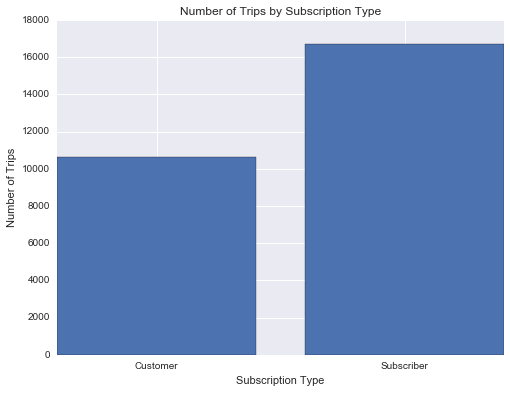

In [8]:
usage_plot(trip_data, 'subscription_type')

在第一个月，订购者的行程比客户的行程多大约 50%。

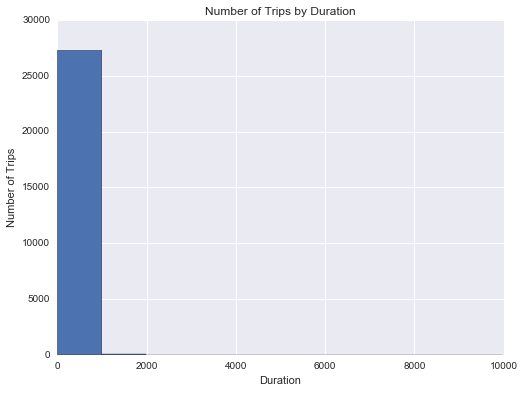

In [9]:
usage_plot(trip_data, 'duration')

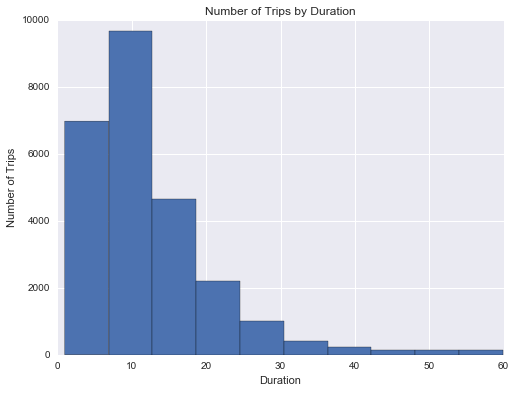

In [10]:
usage_plot(trip_data, 'duration', ['duration < 60'])

大多数行程实际上持续时间都不足 30 分钟

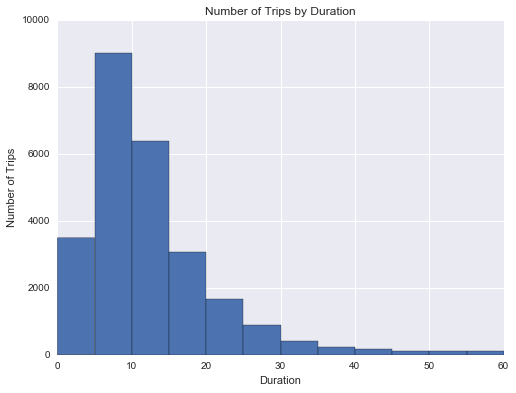

In [11]:
usage_plot(trip_data, 'duration', ['duration < 60'], boundary = 0, bin_width = 5)

五分钟到十分钟之间的行程持续时间显示最多的出行次数，这个范围大约有九千次出行。

In [12]:
station_data = ['201402_station_data.csv',
                '201408_station_data.csv',
                '201508_station_data.csv' ]
trip_in = ['201402_trip_data.csv',
           '201408_trip_data.csv',
           '201508_trip_data.csv' ]
trip_out = 'babs_y1_y2_summary.csv'

# This function will take in the station data and trip data and
# write out a new data file to the name listed above in trip_out.
summarise_data(trip_in, station_data, trip_out)

In [13]:
trip_data = pd.read_csv('babs_y1_y2_summary.csv')
display(trip_data.head())

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,8,14,Thursday,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,8,14,Thursday,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,8,10,Thursday,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,8,11,Thursday,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,8,12,Thursday,San Francisco,San Francisco,Subscriber


In [14]:
usage_stats(trip_data)

There are 669959 data points in the dataset.
The average duration of trips is 18.47 minutes.
The median trip duration is 8.62 minutes.
25% of trips are shorter than 5.73 minutes.
25% of trips are longer than 12.58 minutes.


array([  5.73333333,   8.61666667,  12.58333333])

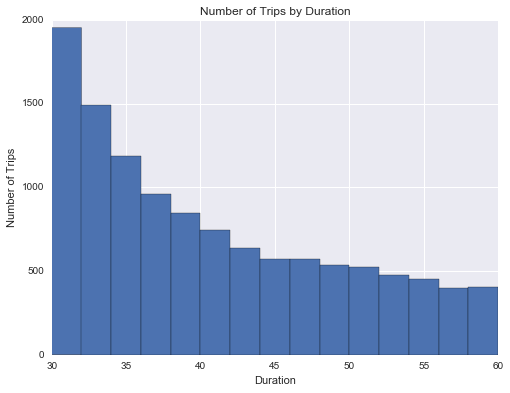

In [15]:
usage_plot(trip_data, 'duration', ["duration < 60", "duration > 30" , "start_city == 'San Francisco'"] , boundary = 0, bin_width = 2)

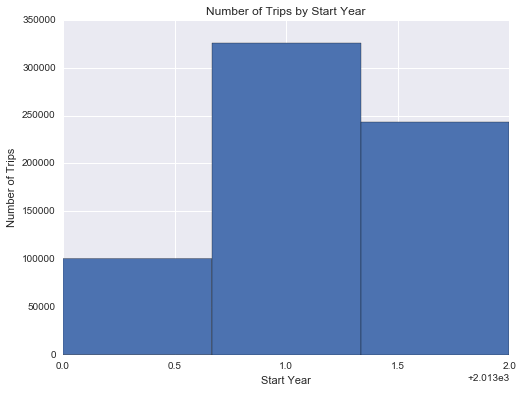

In [16]:
usage_plot(trip_data,'start_year' ,n_bins=3)

总结：以二月份的时候人数最少，十月份的人数次之，十二月的时候人数暴涨。
2014年的租借情况：

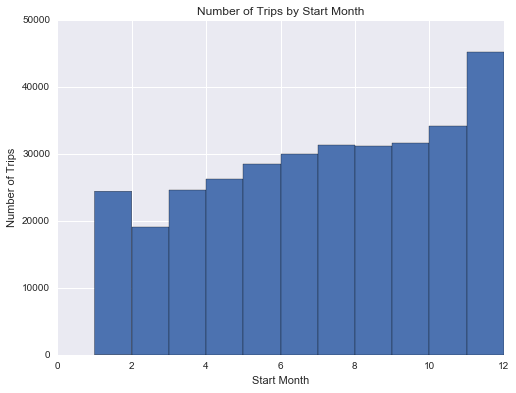

In [17]:
usage_plot(trip_data,'start_month', ['start_year == 2014'],n_bins=11)

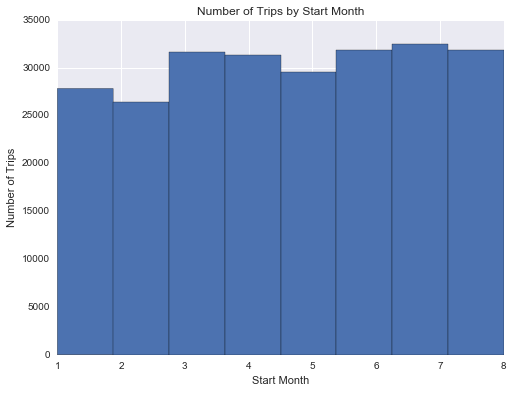

In [18]:
# Final Plot 1
usage_plot(trip_data,'start_month', ['start_year == 2015'], n_bins= 8 )

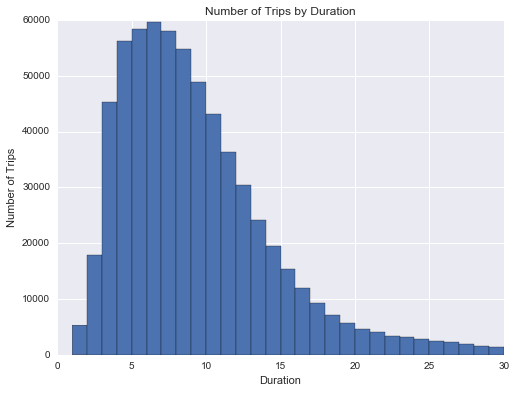

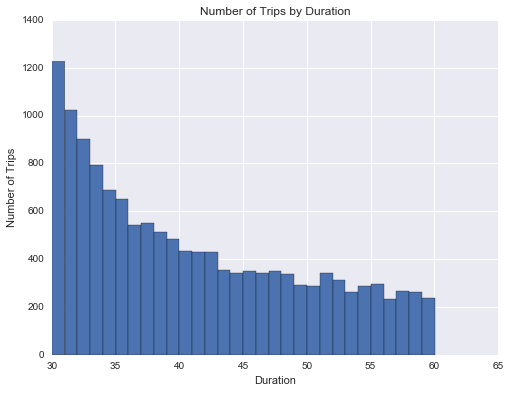

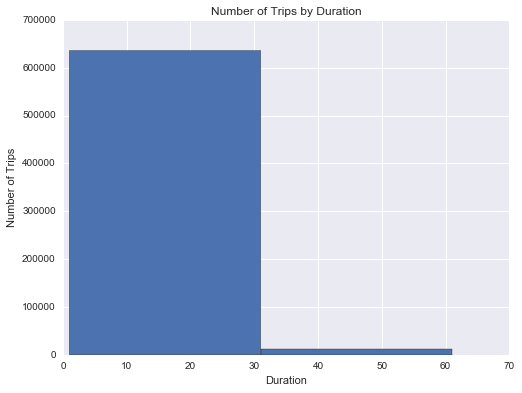

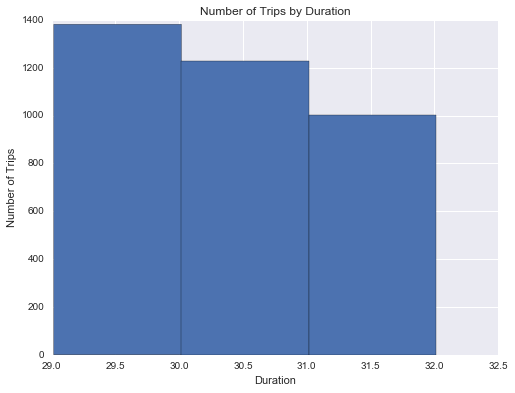

In [19]:
# Final Plot 2
usage_plot(trip_data,'duration', ['duration < 30'],bin_width = 1)
usage_plot(trip_data, 'duration', ["duration < 60", "duration > 30"] ,bin_width = 1)
usage_plot(trip_data, 'duration',["duration < 60"], bin_width=30)
usage_plot(trip_data, 'duration',["duration > 29","duration < 32"], bin_width=1 )

以上显示了小于半个小时的使用人数（即免费使用的人的总数），30分钟内的使用者人数主要集中在5-10分钟，之后持续下降。对比在30分钟以内（即免费使用者），30分钟到60分钟以内的使用者人数相差巨大。对比边际情况（29到32分钟内），其依然服从5-10分钟之后的使用者递减规律。